In [37]:
import requests
import json
import pandas as pd
from bs4 import BeautifulSoup
import altair as alt
import numpy as np
from math import sin, cos, sqrt, atan2, radians
import matplotlib.pyplot as plt
from google_functions import *

In [38]:
cov_data = pd.read_csv("../data-raw/license_data.csv", sep=";")

C:\Users\Zeliha\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [39]:
keys = get_keys(".secret/key.json")
API_Key = keys['API_Key']

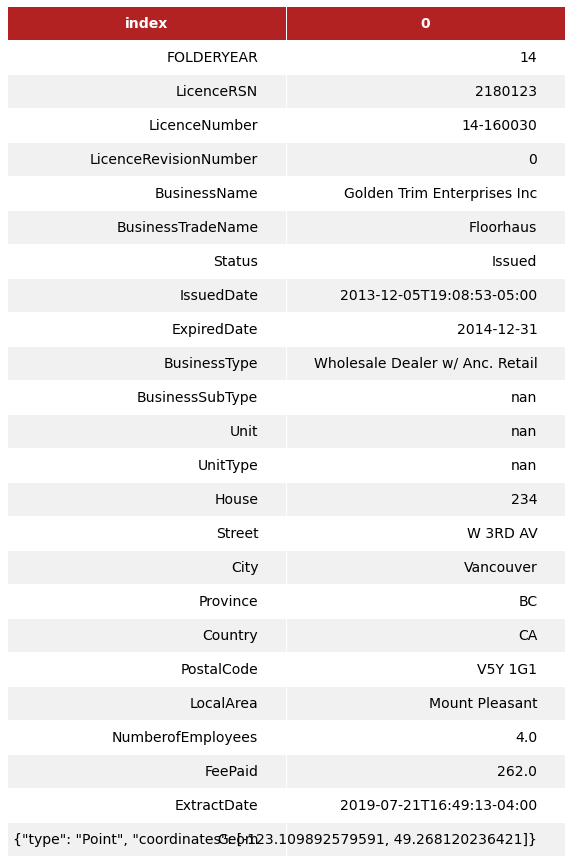

In [40]:
fig_1, ax_1 = fancy_table(pd.DataFrame(cov_data.iloc[0]).reset_index(), header_columns=0, col_width=5)
fig_1.savefig("../data-processed/Overview_1.png")

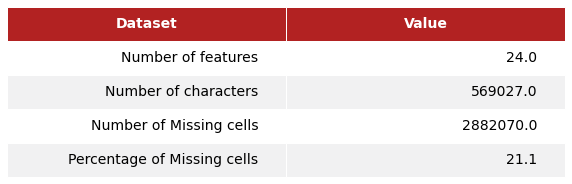

In [41]:
overview_data = generate_dataset_overview(cov_data)
fig_2, ax_2 = fancy_table(overview_data, header_columns=0, col_width=5)
fig_2.savefig("../data-processed/Overview_2.png")

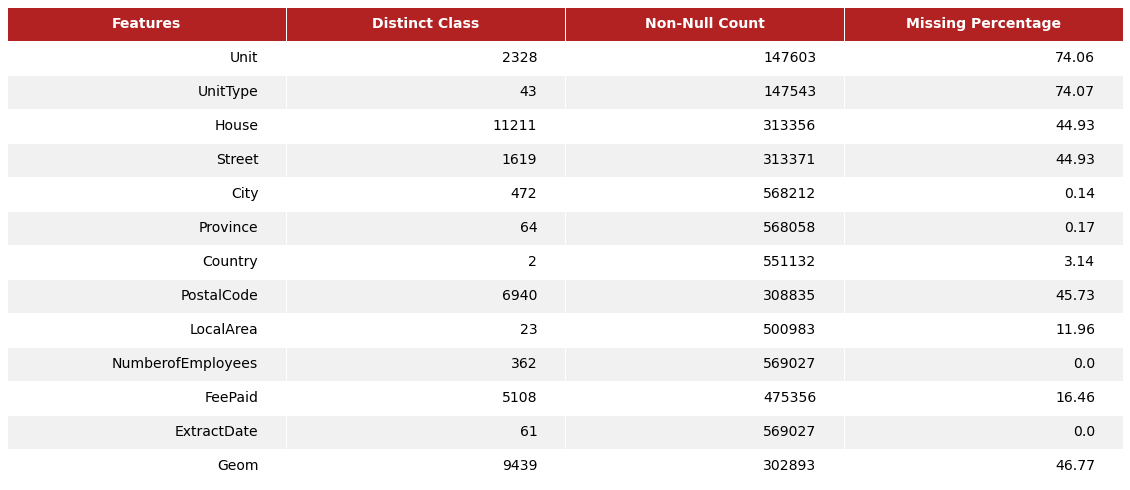

In [42]:
overview_feature = generate_feature_overview(cov_data.iloc[:,-13:])
fig_3, ax_3 = fancy_table(overview_feature, header_columns=0, col_width=5)
fig_3.savefig("../data-processed/Overview_3.png")

In [43]:
funerals = cov_data[cov_data['BusinessType'] == 'Funeral Services']
business_name_list = list(funerals['BusinessName'])
funeral_google = get_address_google(business_name_list, API_Key)

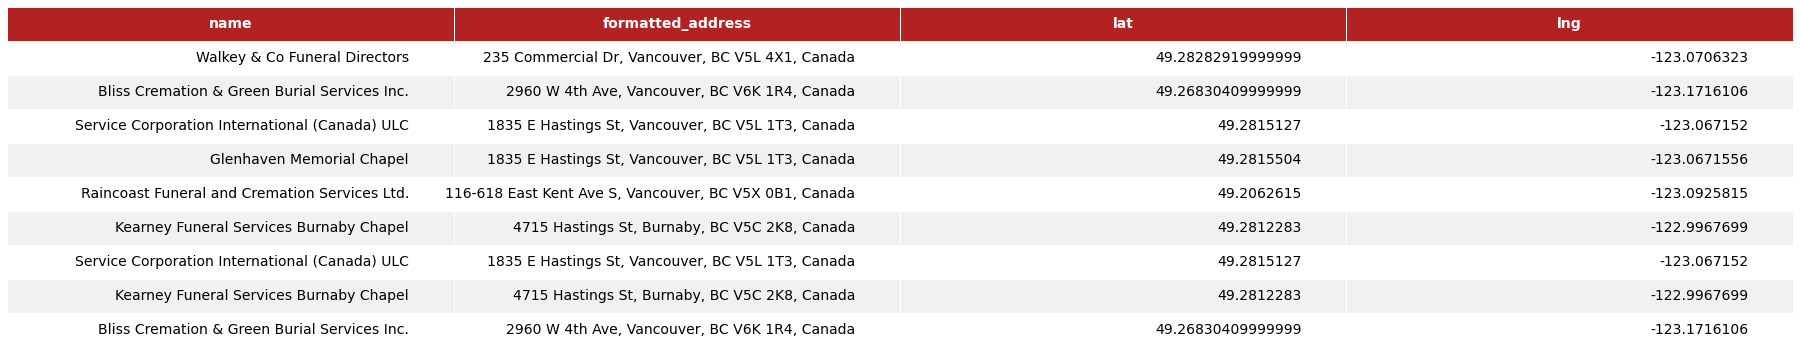

In [44]:
summary_funeral = funeral_google[['name', 'formatted_address', 'lat', 'lng']][11:20]
fig_4, ax_4 = fancy_table(summary_funeral, header_columns=0, col_width=8)
fig_4.savefig("../data-processed/google_4.png")

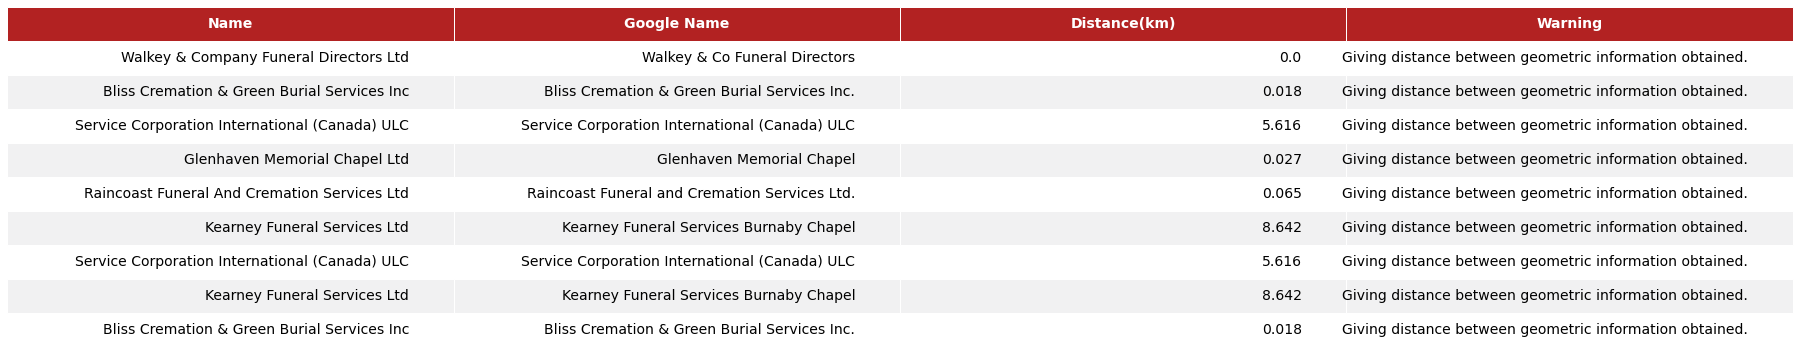

In [45]:
format_funerals = format_coordinate(funerals)
distance_funeral = get_comparison_dataframe(format_funerals, API_Key)
distance_funeral = distance_funeral.round(3)
fig_5, ax_5 = fancy_table(distance_funeral[11:20], header_columns=0, col_width=8)
fig_5.savefig("../data-processed/google_5.png")

In [46]:
chart = google_map_figure(distance_funeral)
chart.save("../data-processed/google_map.html")
chart

alt.Chart(...)